In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib
from pathlib import Path
import shutil



In [2]:
train_df = pd.read_csv('/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/object-CXR/train.csv')
train_df.head()


,image_name,annotation
0,00001.jpg,NaN
1,00002.jpg,NaN
2,00003.jpg,NaN
3,00004.jpg,NaN
4,00005.jpg,0 2076 1559 2369 1695


In [3]:
train_df = train_df.dropna()
train_df.reset_index()

,index,image_name,annotation
0,4,00005.jpg,0 2076 1559 2369 1695
1,5,00006.jpg,0 1368 2587 1692 3039
2,6,00007.jpg,0 944 188 2064 806
3,7,00008.jpg,0 730 1720 1897 2673
4,8,00009.jpg,0 847 1346 1345 1877
...,...,...,...
3995,7991,07992.jpg,0 310 1814 2271 2472;0 430 1598 581 1738;0 279...
3996,7993,07994.jpg,2 402 187 402 209 402 213 402 215 402 217 402 ...
3997,7994,07995.jpg,2 705 203 719 217 730 233 749 261 763 295 783 ...
3998,7997,07998.jpg,0 1072 696 1375 1432


In [4]:
images_path = Path(f"/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/foreign_object_xrays")
labels_path = Path(f"/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/foreign_object_xrays/labels")

TRAIN_IMG_PATH = images_path

In [ ]:
# labels_path = Path(f"/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/object-CXR/train/labels")
# labels_path.mkdir(parents=True, exist_ok=True)
# for index, row in train_df.iterrows():
#      # print(row)
#     image_name = row["image_name"]
#     image_id= image_name[:-4]
#     label_name = f"{image_id}.txt"
    
#     with (labels_path / label_name).open(mode="w") as label_file:
#         if row['annotation']!=None:
#             coord_list = row["annotation"].split(';')
#             for line in coord_list:
#                 label_file.write( f"{line}\n")

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 4 to 7998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  4000 non-null   object
 1   annotation  4000 non-null   object
dtypes: object(2)
memory usage: 93.8+ KB


In [17]:
img = train_df.loc[6510]['image_name']
anno = train_df.loc[6510]['annotation']

image = cv2.imread(os.path.join(TRAIN_IMG_PATH,img), cv2.COLOR_RGB2GRAY)

anno


'0 966 223 1445 669;0 1850 223 2296 675'

(3032, 3032, 3)


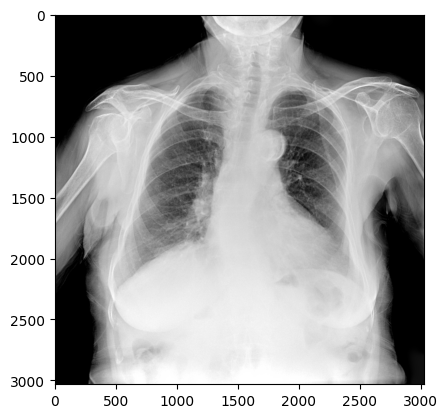

In [18]:
print(image.shape)
plt.imshow(image)


In [8]:
def find_coord(anno):
    
    annotation = anno
    coordinates = [0, 0, 0, 0]

    x1 = coordinates[0] = annotation[1]
    y1 = coordinates[1] = annotation[2]
    x2 = coordinates[2] = annotation[3]
    y2 = coordinates[3] = annotation[4]

    #print(coordinates)
    return [x1, y1, x2,y2]


In [10]:
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)
def bbox_to_ellipse(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    x_c = (bbox[0] + bbox[2]) / 2
    y_c = (bbox[1] + bbox[3]) / 2
    return matplotlib.patches.Ellipse(
        xy=(x_c,y_c), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)
def bbox_to_polygon(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    lis=[]
    for i in range(0,len(bbox),2):
        lis.append([bbox[i],bbox[i+1]])
    # print(lis)
    points=np.array(lis)
    # print(points)
    return matplotlib.patches.Polygon(
        xy=points,edgecolor=color, linewidth=0.5,fill=False)


In [13]:
rect_coordinates = {}
poly_coordinates = {}
ecl_coordinates = {}
rect=poly=ecl=0
# dst_path=foreign_object_xrays_path
rect_list=[]
poly_list=[]
ell_list=[]

for annot in train_df.index:
    
    isPoly=0
    coord_list = train_df.loc[annot, "annotation"].split(';')
    image_name= train_df.loc[annot, "image_name"]
    for i in coord_list:
        coord= i.split(' ')
        if coord[0]== '0':
            rect+=1
            rect_list.append(image_name)
            # print(train_df.loc[annot]['image_name'])

            if annot not in rect_coordinates:
                rect_coordinates[annot]=[]
            anno = []
            for i in coord:
                anno.append(int(i))
            rect_coordinates[annot].append(anno)
        elif coord[0]=='1':
            ell_list.append(image_name)
            # shutil.copy(src_path, dst_path)
            ecl+=1
            anno = []
            if annot not in ecl_coordinates:
                ecl_coordinates[annot]=[]
            for i in coord:
                anno.append(int(i))
            ecl_coordinates[annot].append(anno)            
        elif coord[0]=='2':
            poly+=1
            anno = []
            isPoly=1
            poly_list.append(image_name)
            if annot not in poly_coordinates:
                poly_coordinates[annot]=[]
            for i in coord:
                anno.append(int(i))
            poly_coordinates[annot].append(anno)
    # if isPoly==0:
        # src_path=os.path.join(TRAIN_IMG_PATH, train_df.loc[annot]['image_name'])
        # # src_path= images_path + str()
        # # print(dst_path)
        # shutil.copy(src_path, dst_path)
    # break

In [14]:
len(list(set(poly_list)))

239

In [15]:
os.path.join(TRAIN_IMG_PATH)

'/Users/ashokkakunuri/Desktop/Deep Learning/Project_3/foreign_object_xrays'

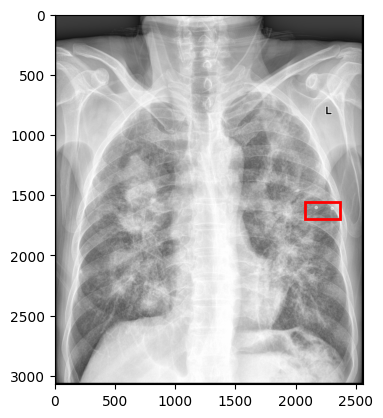

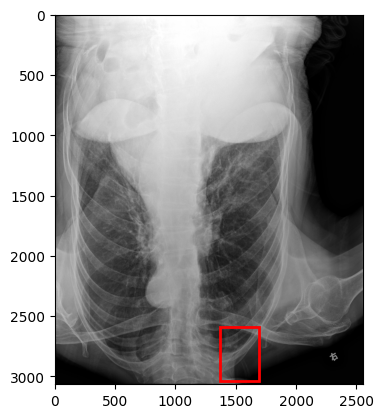

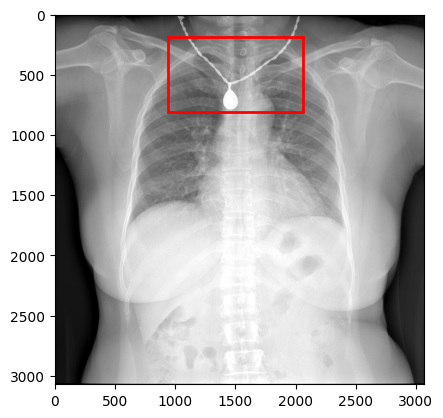

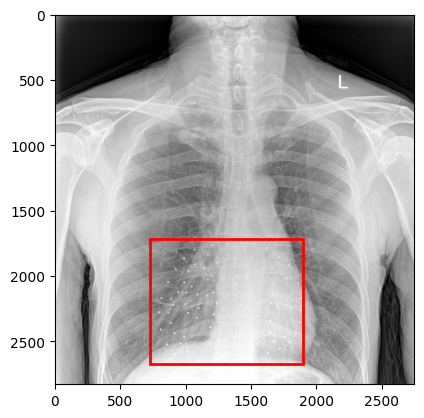

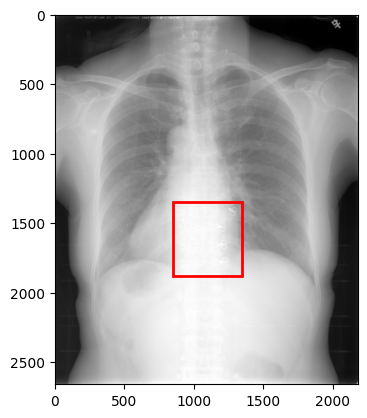

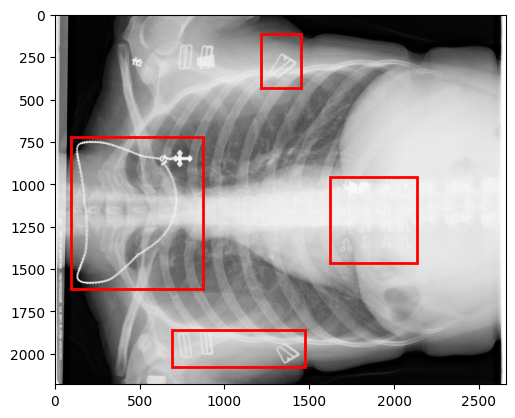

In [30]:
j=0
for i in rect_coordinates:
    j+=1
    img=train_df.loc[i]['image_name']
    image = cv2.imread(os.path.join(TRAIN_IMG_PATH, img), cv2.COLOR_RGB2GRAY)
    fig = plt.imshow(image)
    # fig = plt.imshow(img)
    for k in rect_coordinates[i]:
        fig.axes.add_patch(bbox_to_rect(find_coord(k), 'red'))
    # fig.axes.add_patch(bbox_to_rect(find_coord(rect_coordinates[i]), 'red'))   
    plt.show()
    if j>1:
        break

38


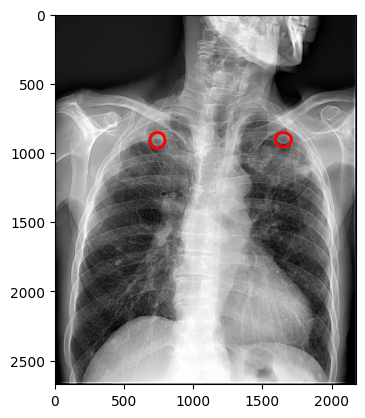

124


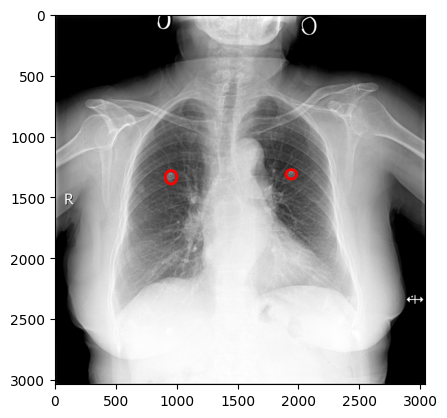

459


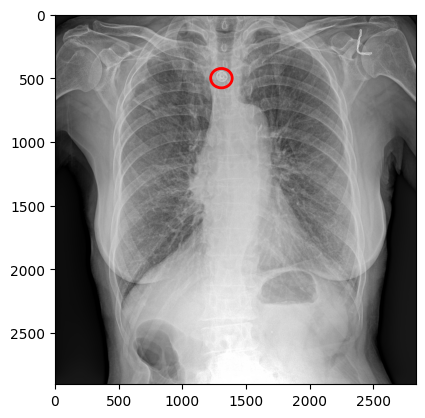

470


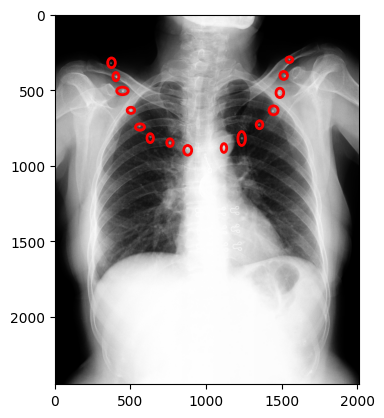

694


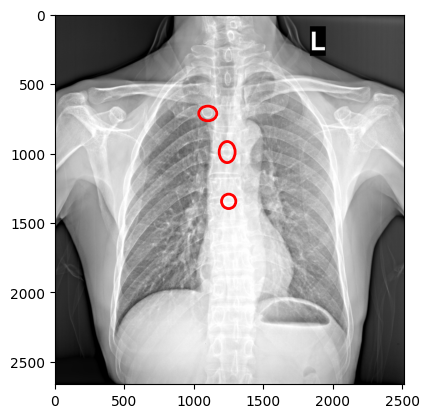

863


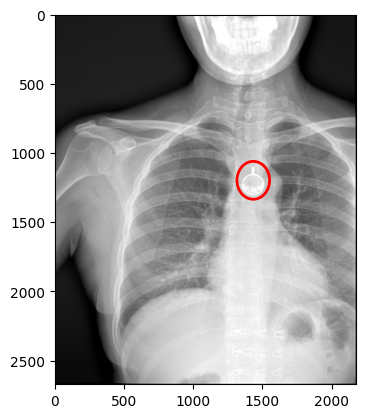

In [31]:
j=0
for i in ecl_coordinates:
    print(i)
    j+=1
    img=train_df.loc[i]['image_name']
    image = cv2.imread(os.path.join(TRAIN_IMG_PATH, img), cv2.COLOR_RGB2GRAY)
    fig = plt.imshow(image)
    # fig = plt.imshow(img)
    for k in ecl_coordinates[i]:
        fig.axes.add_patch(bbox_to_ellipse(find_coord(k), 'red'))
    # fig.axes.add_patch(bbox_to_rect(find_coord(rect_coordinates[i]), 'red'))   
    plt.show()
    if j>5:
        break

58


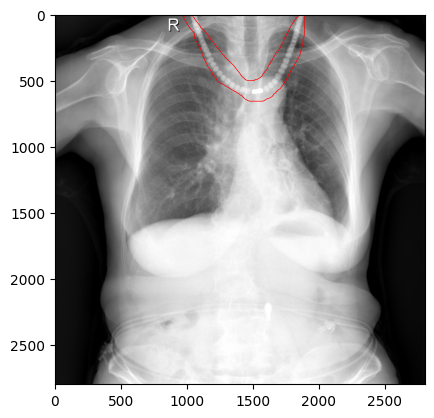

126


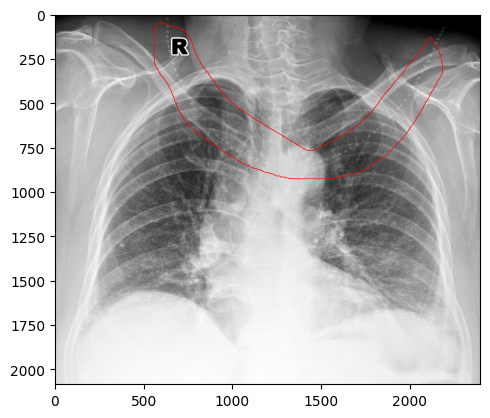

205


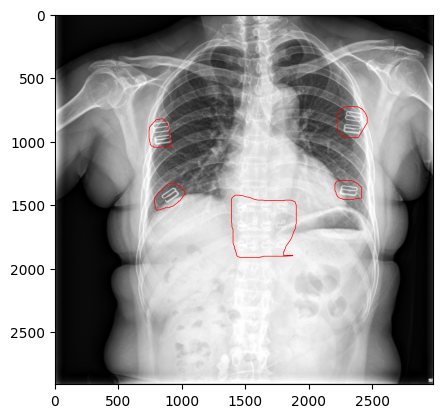

248


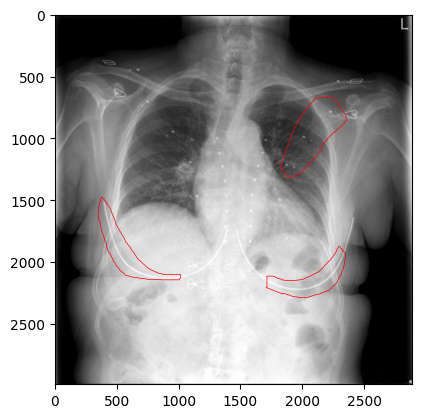

279


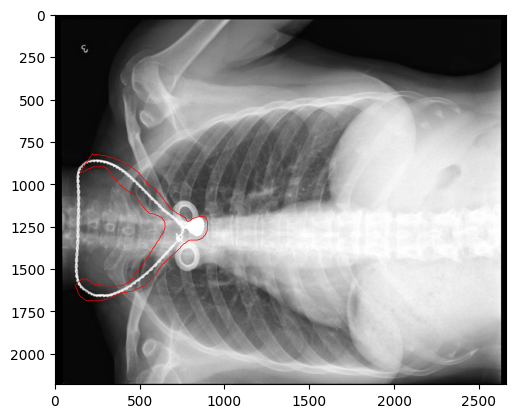

290


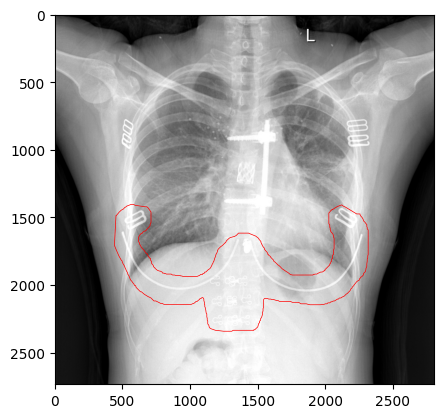

In [32]:
j=0
for i in poly_coordinates:
    print(i)
    j+=1
    img=train_df.loc[i]['image_name']
    image = cv2.imread(os.path.join(TRAIN_IMG_PATH, img), cv2.COLOR_RGB2GRAY)
    fig = plt.imshow(image)
    # fig = plt.imshow(img)
    # print(poly_coordinates[i])
    for k in poly_coordinates[i]:
        
        fig.axes.add_patch(bbox_to_polygon(k[1:], 'red'))
    # fig.axes.add_patch(bbox_to_rect(find_coord(rect_coordinates[i]), 'red'))   
    plt.show()
    if j>5:
        break

In [ ]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy==1.17
!pip install PyYAML==5.3.1


In [ ]:

!pip install PyYAML


In [ ]:
import torch;
torch.__version__



In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)


In [ ]:
ls

In [ ]:
train_df